# using Logistic Regression to train the model

In [2]:
pip install pcm

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of pcm to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/47.3 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.3 kB ? eta -:--:--
   ------------------------- -------------- 30.7/47.3 kB 435.7 kB/s eta 0:00:01
   ------------------------- -------------- 30.7/47.3 kB 435.7 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.3 kB 195.7 kB/s eta 0:00:01
   ---------------------------------------- 47.3/47.3 kB 215.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/57.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/57.4 kB ? eta -:--:--
   ------- -------------------------------- 10.2/57.4 kB ? eta -:--:--
   --------------------- ------------------ 30.7/57.4 kB 435.7 kB/s eta 0:00:01
   ---------------------------

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
# from PCM.PCM import plot_confusion_matrix
import pickle


In [2]:
df=pd.read_pickle("D:/Wake word detection/Processed_data_file/audio_data.csv")

In [3]:
df.head()

,feature,class_label
0,"[-785.49194, 115.91496, 0.42386302, 3.0818355,...",0
1,"[-802.4487, 110.475174, 3.2916794, 1.5037693, ...",0
2,"[-783.04083, 116.88343, 0.9062586, 1.0534269, ...",0
3,"[-789.7149, 110.97373, 0.37877244, 3.1957994, ...",0
4,"[-761.6227, 124.40632, -2.1690712, 4.853089, -...",0


In [4]:
X = df["feature"].values
X = np.concatenate(X, axis=0).reshape(len(X), 40)

y = np.array(df["class_label"].tolist())

In [5]:
X,y

(array([[-7.85491943e+02,  1.15914963e+02,  4.23863024e-01, ...,
          4.17268181e+00, -4.86754745e-01,  2.41797042e+00],
        [-8.02448730e+02,  1.10475174e+02,  3.29167938e+00, ...,
          3.52485108e+00, -6.99103236e-01,  3.37527490e+00],
        [-7.83040833e+02,  1.16883430e+02,  9.06258583e-01, ...,
          1.27726424e+00, -1.83211577e+00,  2.97432566e+00],
        ...,
        [-6.06486328e+02,  8.48492126e+01, -8.04930687e+00, ...,
         -2.58353353e+00,  3.19380808e+00, -2.22776011e-02],
        [-6.33077942e+02,  8.15356750e+01, -7.38479644e-02, ...,
          1.16767478e+00,  1.92375302e+00, -4.41440880e-01],
        [-5.93576904e+02,  6.63030930e+01, -4.30666399e+00, ...,
          4.40964311e-01,  3.91681880e-01, -9.29246664e-01]], dtype=float32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
logit_reg = LogisticRegression(max_iter=100000)
logit_reg.fit(X_train, y_train)
score = logit_reg.score(X_test, y_test)
print("Model Score: \n")
print(score)

Model Score: 

0.95


In [11]:
import matplotlib.pyplot as plt


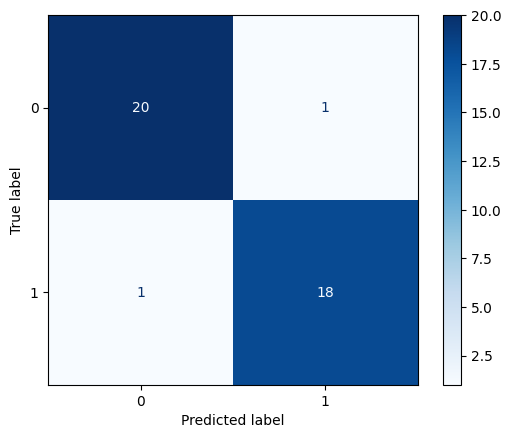

In [13]:
y_pred = logit_reg.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [15]:
print(X_test,y_pred)

[[-7.6924158e+02  1.1929252e+02  4.0567744e-01 ...  9.6396846e-01
  -8.2746547e-01  3.4697011e+00]
 [-7.6378900e+02  1.0109766e+02 -6.2186728e+00 ...  4.4134898e+00
   6.9351006e-01  3.8272994e+00]
 [-7.7969757e+02  1.1455907e+02 -9.1587174e-01 ...  2.0939121e+00
  -8.1427228e-01  4.9433680e+00]
 ...
 [-5.5372528e+02  4.8484158e+01 -4.5110774e-01 ... -4.8421639e-01
   1.6372480e+00  1.7727469e-01]
 [-6.0239386e+02  6.4755386e+01  1.7610765e+00 ... -8.1181479e-01
   9.0129793e-01 -5.0383985e-01]
 [-7.3853632e+02  1.2519090e+02 -1.7065229e+01 ...  1.5300106e+00
  -3.0200708e+00  1.9560792e+00]] [0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1]


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [17]:
pickle.dump(logit_reg, open('D:/Wake word detection/Saved Models/Logistic_reg_wakeword.txt', 'wb'))
